In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras import losses
from tensorflow.keras.datasets import mnist

In [2]:
# Load MNIST data
(x_train, _), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Define VAE model
batch_size = 100
original_dim = 28 * 28
latent_dim = 2
intermediate_dim = 256
epochs = 50

x = Input(shape=(original_dim,))
h = Dense(intermediate_dim, activation='relu')(x)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

In [4]:
# Reparameterization trick to sample from latent space
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

In [5]:
# Encoder model
encoder = Model(x, [z_mean, z_log_var, z])

In [6]:
# Decoder model
decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(original_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)
vae = Model(x, x_decoded_mean)

In [7]:
# Loss function for VAE
xent_loss = original_dim * losses.binary_crossentropy(x, x_decoded_mean)
kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
vae_loss = K.mean(xent_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='rmsprop')

In [8]:
# Train VAE on MNIST data
vae.fit(x_train, shuffle=True, epochs=epochs, batch_size=batch_size, validation_data=(x_test, None))

Epoch 1/50
600/600 [==============================] - 10s 6ms/step - loss: 188.4445 - val_loss: 171.5361
Epoch 2/50
600/600 [==============================] - 2s 4ms/step - loss: 169.0732 - val_loss: 167.2733
Epoch 3/50
600/600 [==============================] - 2s 3ms/step - loss: 165.7468 - val_loss: 164.9328
Epoch 4/50
600/600 [==============================] - 3s 4ms/step - loss: 163.5350 - val_loss: 163.0097
Epoch 5/50
600/600 [==============================] - 2s 4ms/step - loss: 161.7063 - val_loss: 161.2017
Epoch 6/50
600/600 [==============================] - 4s 6ms/step - loss: 160.2709 - val_loss: 159.7366
Epoch 7/50
600/600 [==============================] - 4s 7ms/step - loss: 159.1531 - val_loss: 158.8089
Epoch 8/50
600/600 [==============================] - 5s 8ms/step - loss: 158.2163 - val_loss: 158.5487
Epoch 9/50
600/600 [==============================] - 3s 5ms/step - loss: 157.4945 - val_loss: 157.6021
Epoch 10/50
600/600 [==============================] - 2s 4ms/s

In [12]:
# Plot original and reconstructed images
decoded_imgs = vae.predict(x_test)

313/313 [==============================] - 1s 2ms/step


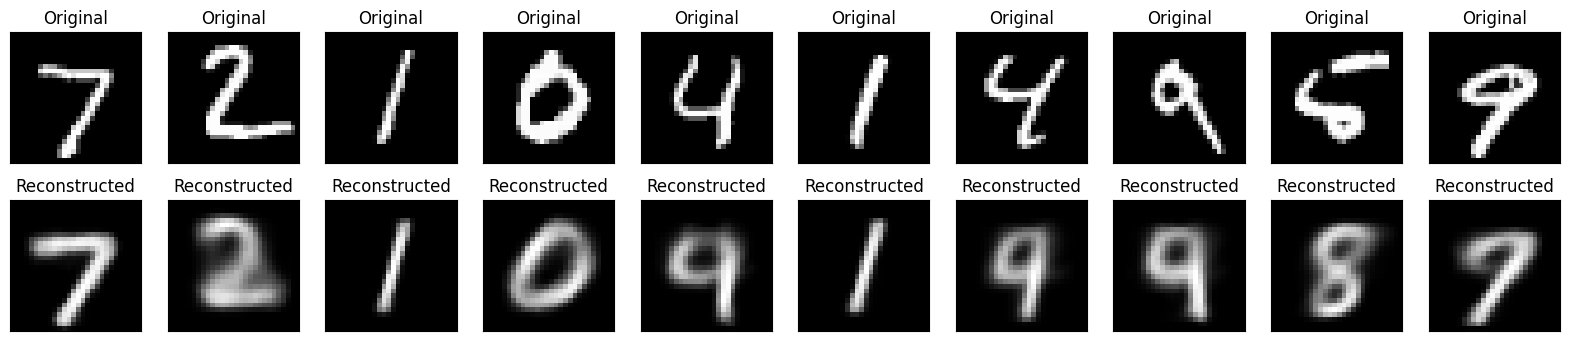

In [13]:
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.title('Original')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.title('Reconstructed')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [13]:
https://drive.google.com/drive/folders/1VkyaySewITLRDYJBdcyxCMSYXmWKNakq